In [64]:
import sys
import os

# Add src directory to Python path
sys.path.append(os.path.abspath("../src"))


In [65]:
import pandas as pd
cleaned_data = pd.read_csv(
    "../data/combined_crime_data.csv",
    dtype={  # Correct parameter name
        'zip': 'string',
        'incident_number': 'string',
        'offense_classification': 'category',
        'was_offense_completed': 'category',
        'location_category': 'category',
        'value_range': 'category',
        'week_day_reported': 'category',
        'week_day_occurred': 'category'
    },
    parse_dates=['date_reported', 'date_occurred']  # Parse datetime columns
)

print(cleaned_data.dtypes)


zip                       string[python]
incident_number           string[python]
date_reported             datetime64[ns]
date_occurred             datetime64[ns]
offense_classification          category
was_offense_completed           category
location_category               category
value_range                     category
week_day_reported               category
week_day_occurred               category
dtype: object


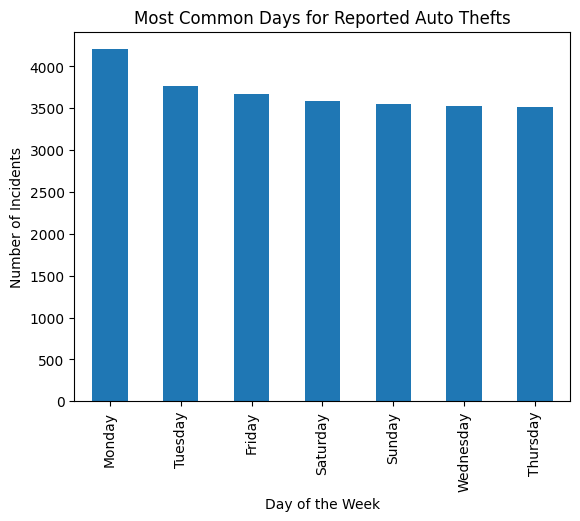

In [66]:
import pandas as pd
import matplotlib

# Group by 'week_day_reported' and count incidents
most_common_days = cleaned_data['week_day_reported'].value_counts()

# Plot the data
import matplotlib.pyplot as plt

most_common_days.plot(kind='bar', title="Most Common Days for Reported Auto Thefts")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Incidents")
plt.show()


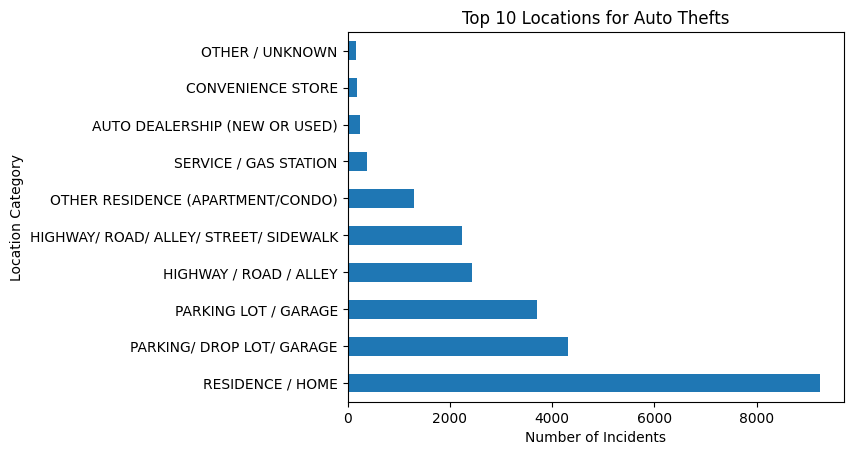

In [67]:
# Count occurrences of each location category
common_locations = cleaned_data['location_category'].value_counts().head(10)

# Plot the data
common_locations.plot(kind='barh', title="Top 10 Locations for Auto Thefts")
plt.xlabel("Number of Incidents")
plt.ylabel("Location Category")
plt.show()



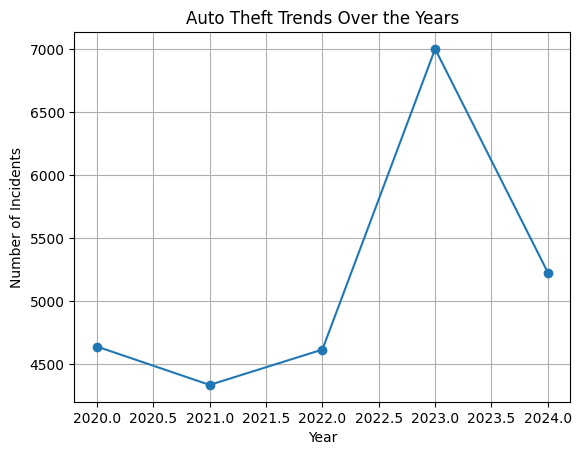

In [68]:
# Extract the year from the 'date_reported' column
cleaned_data['year_reported'] = cleaned_data['date_reported'].dt.year

# Group by year and count incidents
yearly_trends = cleaned_data.groupby('year_reported').size()

# Plot the trends
yearly_trends.plot(kind='line', marker='o', title="Auto Theft Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()


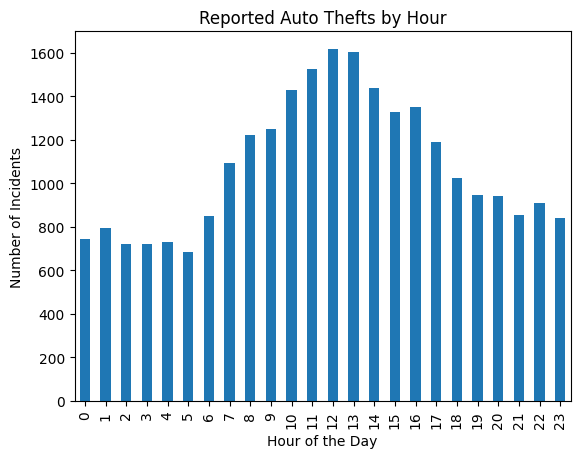

In [69]:
# Extract hour from the 'date_reported' column
cleaned_data['hour_reported'] = cleaned_data['date_reported'].dt.hour

# Group by hour and count incidents
hourly_trends = cleaned_data['hour_reported'].value_counts().sort_index()

# Plot the data
hourly_trends.plot(kind='bar', title="Reported Auto Thefts by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Incidents")
plt.xticks(range(0, 24))
plt.show()


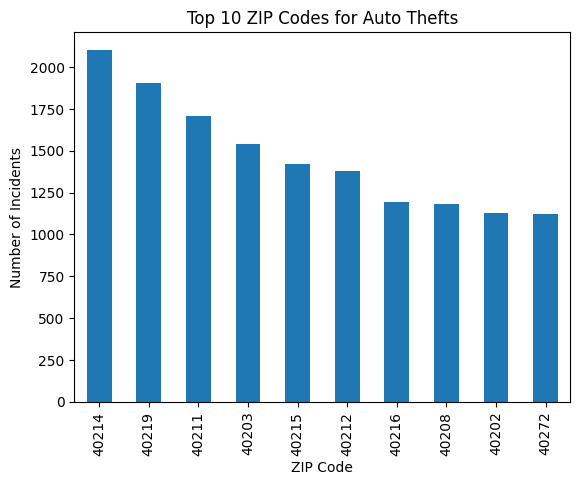

In [70]:
# Count incidents by ZIP code
theft_by_zip = cleaned_data['zip'].value_counts().head(10)

# Plot the data
theft_by_zip.plot(kind='bar', title="Top 10 ZIP Codes for Auto Thefts")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Incidents")
plt.show()


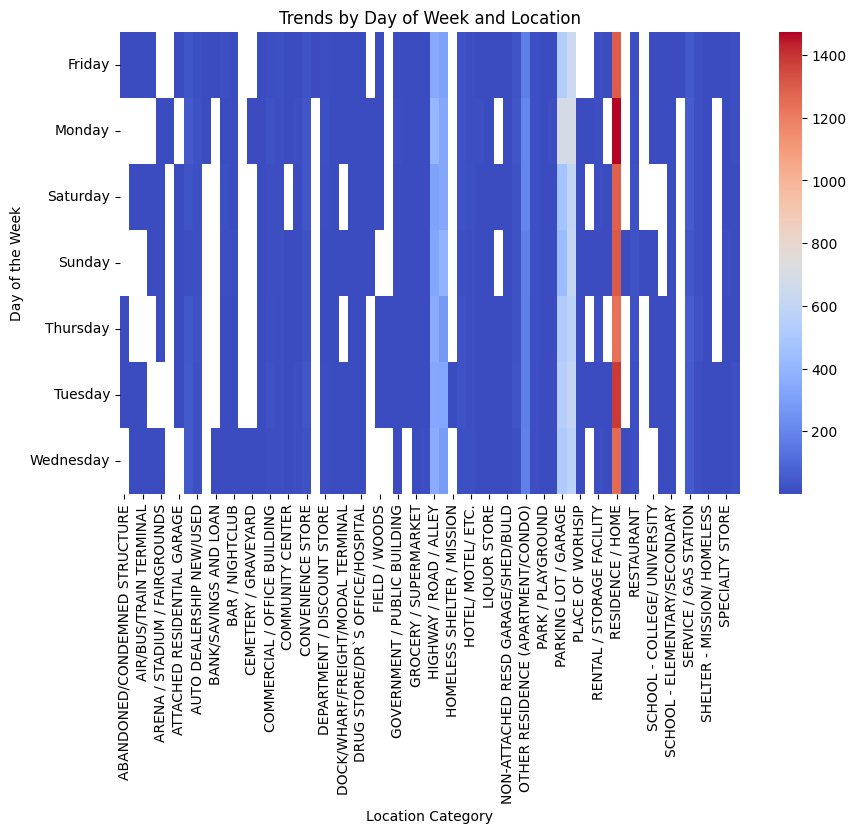

In [72]:
# Group by 'week_day_reported' and 'location_category'
combined_trends = cleaned_data.groupby(
    ['week_day_reported', 'location_category'], observed=True
).size().unstack()

# Heatmap of combined trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(combined_trends, annot=False, cmap="coolwarm")
plt.title("Trends by Day of Week and Location")
plt.xlabel("Location Category")
plt.ylabel("Day of the Week")
plt.show()


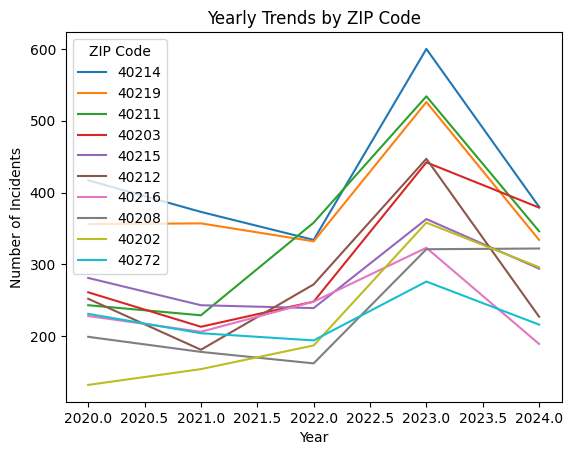

In [56]:
# Group by year and ZIP code
yearly_zip_trends = cleaned_data.groupby(['year_reported', 'zip']).size().unstack(fill_value=0)

# Line plot for selected ZIP codes
top_zip_codes = theft_by_zip.index  # Use top ZIP codes from previous analysis
yearly_zip_trends[top_zip_codes].plot(kind='line', title="Yearly Trends by ZIP Code")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="ZIP Code")
plt.show()
